In [93]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5.1.1

In [94]:
# define fit A mat
def designmatpoly(X, wtvector):
    X = X[:,0]
    A_traint = np.ones(X.shape)
    #print (len(wtvector), np.shape(A_traint))    
    
    for i in range(len(wtvector)-1):
        X_row = X**(i + 1)
        A_traint = np.vstack((A_traint, X_row))         
    A_train = A_traint.T
    #print (np.shape(A_train))
    return A_train

# regularisation gradient descent function
def reg_gradientdescent(w, X, y, l2, rate, n_iterations):
    wtseq = [w]
    for iteration in range(n_iterations):
        #print('iteration is:', iteration)
        gradients =  2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        #print ('gradients',gradients)
        w = w - rate * gradients
    print ('final gradient',gradients)
    return w

# squared residuals
def squared_residual(x_test, y_test, wt):
    residual = 0
    x_test = x_test[:,0]
    
    for i in range(len(x_test)):
        y_predi = 0
        x_testi = x_test[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_testi, wti)
        residual += (y_test[i] - y_predi)**2   
    #print('residual is:************ ', residual)
    return residual

# predicted value
def predict(x, wt):    
    y_pred = []
    
    for i in range(len(x)):
        y_predi = 0
        x_i = x[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_i, wti)
#             print(wt[wti]*np.power(x_i, wti))
#             print('---------------------------------')
#         print('*************')
        y_pred.append(y_predi)
#   print('y_pred shape',np.shape(y_pred))
    return y_pred

In [159]:
# data preperation
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

points = 180
X = np.linspace(0, 2*np.pi,points)
y = f(X)+np.random.normal(0,0.05,points)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

### 5.1.2

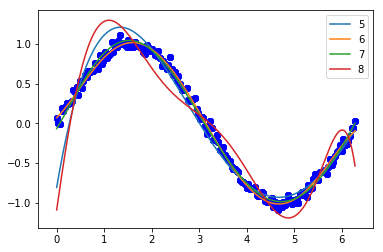

In [160]:
# analytical expression
from numpy.linalg import inv
for i in range(4):
    degree = i + 5
    w0 = np.ones(degree)
    A = designmatpoly(X, w0)
    wt_analy = inv(A.T.dot(A) - 0.5*np.eye(degree)).dot(A.T).dot(y)
    ypred = predict(X, wt_analy)
    plt.plot(X, ypred, label = degree)
    plt.legend()
    plt.scatter(X,y, c='b')

### 5.1.3 a

final gradient [ 0.03224469 -0.01853868 -0.00356526  0.00270314 -0.00029156]
init wt  [1. 1. 1. 1. 1.]
final weight  [ 0.43447358  0.40482211  0.02514232 -0.10610711  0.01452577]
residual: 1.6138359041746697  degree: 5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
final gradient [ 0.53886151  0.34142966  0.04638745 -0.2575142   0.07968212 -0.00666717]
init wt  [1. 1. 1. 1. 1. 1.]
final weight  [ 0.49297909  0.38912796  0.12781126 -0.20190752  0.04024527 -0.00209612]
residual: 0.8879642982144007  degree: 6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
final gradient [ 0.66759912  0.54908147  0.32793244  0.01434751 -0.21041451  0.06342733
 -0.00512169]
init wt  [1. 1. 1. 1. 1. 1. 1.]
final weight  [ 0.32869541  0.28356472  0.17128632  0.01153883 -0.09441212  0.02533506
 -0.00183398]
residual: 0.5782734858700522  degree: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


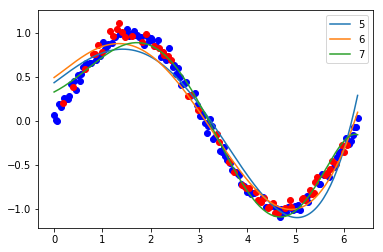

In [161]:
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

for i in range(3):
    degree = i + 5
    w0 = np.ones(degree)  # polynomial degree
    A_train = designmatpoly(X_train, w0)
    
    if degree == 5:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 0, rate = 0.0000015, n_iterations = 2000000) # take lamda = 1 here
    elif degree == 6:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 0.5, rate = 0.00000001, n_iterations = 40000000) # take lamda = 1 here
    elif degree == 7:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 1, rate = 0.000000002, n_iterations = 200000000) # take lamda = 1 here
    else:
        pass
    print('init wt ',w0)
    print('final weight ',wtfin)
    resid = squared_residual(X_test, y_test, wtfin)
    ypred = predict(X, wtfin)
    plt.plot(X, ypred, label = degree)
    plt.legend() 
    title = 'residual: ' + str(resid) + '  degree: ' + str(degree)
    print(title)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

In [ ]:
# [ 0.11808554  0.19689184  0.31727733 -0.19938172  0.02653888 -0.00056433]
# [ 0.46099906  0.39040219  0.2214649  -0.00202124 -0.11955822  0.03388069
#  -0.00255063]


### 5.1.3 b

final gradient [ 0.02341672 -0.01740003  0.00123652  0.00086941 -0.00011733]
final gradient [ 0.02276636  0.00274894 -0.017024    0.00576689 -0.00051985]
final gradient [ 0.00899386  0.00209304 -0.00765869  0.00253024 -0.00022615]
final gradient [ 2.88012657e-03  7.97177007e-04 -2.57018785e-03  8.42029532e-04
 -7.50380127e-05]
final gradient [ 8.37506277e-04  2.51541586e-04 -7.65667493e-04  2.49790327e-04
 -2.22273029e-05]
final gradient [ 2.30352170e-04  7.25637357e-05 -2.13724354e-04  6.95491514e-05
 -6.18322418e-06]
final gradient [ 6.10998860e-05  1.98587437e-05 -5.72562044e-05  1.86006481e-05
 -1.65269163e-06]
final gradient [ 1.57978514e-05  5.24941882e-06 -1.49104214e-05  4.83806944e-06
 -4.29683856e-07]
final gradient [ 4.00795857e-06  1.35389476e-06 -3.80329995e-06  1.23296313e-06
 -1.09467680e-07]
final gradient [ 0.20039933  0.08812849  0.00902233 -0.0682336   0.02097858 -0.00173443]
final gradient [ 0.4025746   0.24276271  0.03372278 -0.18186643  0.05571645 -0.0046245 ]
fin

KeyboardInterrupt: 

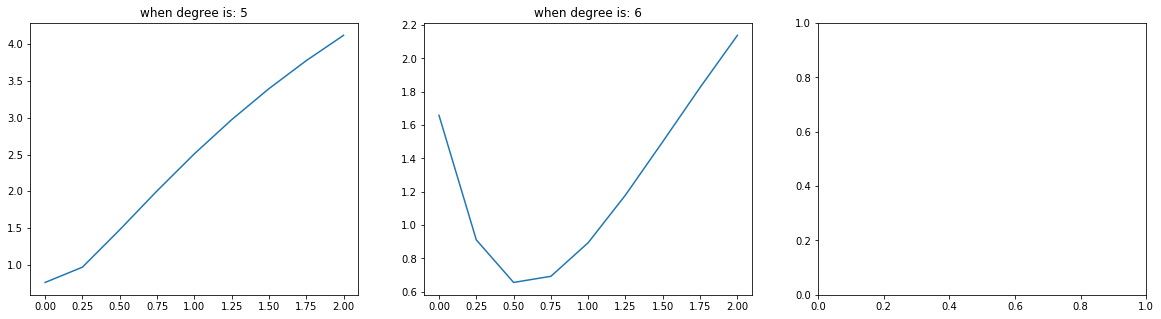

In [156]:
# calculate best of lambda time limit i just calculate degree 5 and 6
l2_coef = np.linspace(0,2,9)
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
resid = np.zeros((3,9))

for i in range(3):
    degree = i + 5
    w0 = np.ones(degree)  # polynomial degree
    A_train = designmatpoly(X_train, w0)
    for l2, l2_coefi in enumerate(l2_coef):
        if degree == 5:
            wtfin5 = reg_gradientdescent(w0, A_train, y_train, l2_coefi, rate = 0.0000015, n_iterations = 2000000)
            resid[i,l2] = squared_residual(X_test, y_test, wtfin5)
        elif degree == 6:
            pass
            wtfin6 = reg_gradientdescent(w0, A_train, y_train, l2_coefi, rate = 0.00000001, n_iterations = 40000000)
            resid[i,l2] = squared_residual(X_test, y_test, wtfin6)
        elif degree == 7:
            pass
            wtfin7 = reg_gradientdescent(w0, A_train, y_train, l2_coefi, rate = 0.000000002, n_iterations = 200000000)
            resid[i,l2] = squared_residual(X_test, y_test, wtfin7)
        else:
            pass
    ax[i].plot(l2_coef, resid[i,:])
    ax[i].set_title('when degree is: ' + str(degree))
